# 4-9. 프로젝트: Vocabulary Size를 변경해서 시도해보기
지금까지는 모델을 변경하고, 모델을 조합해서 성능을 올리는 일에 힘썼습니다. 그런데 어쩌면 성능을 높이는 방법은 단순히 모델을 조정하는 일에 한정되지 않을 수 있습니다. 데이터의 전처리는 모델의 성능에 영향을 직접적으로 줍니다. 특히나 Bag of Words를 기반으로 하는 DTM이나 TF-IDF의 경우, 사용하는 단어의 수를 어떻게 결정하느냐에 따라서 성능에 영향을 줄 수 있겠죠.

중요도가 낮은 단어들까지 포함해 너무 많은 단어를 사용하는 경우에도 성능이 저하될 수 있고, 반대로 너무 적은 단어들을 사용해도 성능이 저하될 수 있습니다. 이렇게 변화된 단어의 수는 또 어떤 모델을 사용하느냐에 따라 유리할 수도, 불리할 수도 있습니다.

단어의 수에 따라서 모델의 성능이 어떻게 변하는지 테스트해 봅시다.
```
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)
```
앞서 num_words로 사용할 단어의 수를 조정할 수 있다는 것을 배웠습니다. 빈도수가 많은 순서대로 나열했을 때, num_words의 인자로 준 정숫값만큼의 단어를 사용하고 나머지 단어는 전부 <unk>로 처리하는 원리였었죠.

아래의 두 가지 경우에 대해서 지금까지 사용했던 모델들의 정확도를 직접 확인해 보세요.
    
**1. 모든 단어 사용**
```   
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)
```    
**2. 빈도수 상위 5,000개의 단어만 사용**
```    
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)
```
**3. 직접 단어 개수를 설정해서 사용**
 
위 단계에서 5000으로 제시된 num_words를 다양하게 바꾸어 가며 성능을 확인해보세요. 변화된 단어 수에 따른 모델의 성능을 연구해 보세요. 최소 3가지 경우 이상을 실험해 보기를 권합니다.

>**사용할 모델**         
나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

**4. 딥러닝 모델과 비교해 보기**
    
위 과정을 통해 나온 최적의 모델과 단어 수 조건에서, 본인이 선택한 다른 모델을 적용한 결과와 비교해 봅시다. 감정 분석 등에 사용했던 RNN이나 1-D CNN 등의 딥러닝 모델 중 하나를 선택해서 오늘 사용했던 데이터셋을 학습해 보고 나오는 결과를 비교해 봅시다. 단, 공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.


| 평가문항 | 상세기준 |
| --- | --- |
| 1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가? | 3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다. |
| 2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가? | Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다. |
| 3. 딥러닝 모델을 활용해 성능이 비교 및 확인되었는가? | 동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다. |

In [4]:
pip install sentencepiece

Note: you may need to restart the kernel to use updated packages.


# 데이터 불러오기 / 분석 및 전처리
#### 1. 모든 단어 사용
- 실험을 위해 데이터셋의 모든 단어를 사용한다.
- 해당 데이터셋은 정수 시퀀스로 변환되어 제공된다.

In [5]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [6]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [7]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [8]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


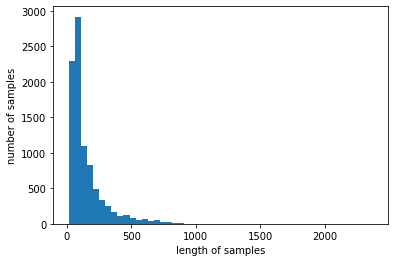

In [9]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

565248/550378 [==============================] - 0s 0us/step


- 0, 1, 2번에 \, \, \ 토큰이 매핑되어있다.
- 이를 위해 index에 3을 더해주는 추가 작업이 필요함

In [11]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [12]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [13]:
x_train[0]

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [14]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [15]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [16]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [18]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [19]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


# 3. 머신러닝 모델 학습
- 나이브 베이즈 분류기
- Complement Naive Bayes Classifier, CNB
- 로지스틱 회귀
- 서포트 벡터 머신(SVM)
- 결정 트리
- 랜덤 포레스트
- 그래디언트 부스팅 트리
- 보팅

In [20]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

In [23]:
def train_ml(tfidfv, y_train, tfidfv_test, y_test):
    # 나이브 베이즈 분류기 
    mod = MultinomialNB()
    mod.fit(tfidfv, y_train)
    
    mod_predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("나이브 베이즈 정확도:", accuracy_score(y_test, mod_predicted)) #예측값과 실제값 비교
    
    # CNB
    cb = ComplementNB()
    cb.fit(tfidfv, y_train)
    
    cb_predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("CNB 정확도:", accuracy_score(y_test, cb_predicted)) #예측값과 실제값 비교
    
    # 로지스틱 회귀 
    lr = LogisticRegression(C=10000, penalty='l2')
    lr.fit(tfidfv, y_train)

    lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("로지스틱 회귀 정확도:", accuracy_score(y_test, lr_predicted)) #예측값과 실제값 비교
    
    # 선형 서포트 벡터 머신 
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
    lsvc.fit(tfidfv, y_train)
    
    lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("SVM 정확도:", accuracy_score(y_test, lsvc_predicted)) #예측값과 실제값 비교
    
    # 결정 트리(Decision Tree) 
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(tfidfv, y_train)
    
    tree_predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("결정 트리 정확도:", accuracy_score(y_test, tree_predicted)) #예측값과 실제값 비교
    
    # 랜덤 포레스트(Random Forest)
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv, y_train)
    
    forest_predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("랜덤 포레스트 정확도:", accuracy_score(y_test, forest_predicted)) #예측값과 실제값 비교
    
    # 그래디언트 부스팅 트리(GradientBoostingClassifier)
    grbt = GradientBoostingClassifier(random_state=0, verbose=3) # verbose=3
    grbt.fit(tfidfv, y_train)

    grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, grbt_predicted)) #예측값과 실제값 비교
    
    # 보팅(Voting)
    voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
        ], voting='soft', n_jobs=-1)
    voting_classifier.fit(tfidfv, y_train)
    
    voting_classifier_predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("보팅 정확도:", accuracy_score(y_test, voting_classifier_predicted)) #예측값과 실제값 비교
    
    return mod, cb, lr, lsvc, tree, forest, grbt, voting_classifier

In [24]:
mod, cb, lr, lsvc, tree, forest, grbt, voting_classifier = train_ml(tfidfv, y_train, tfidfv_test, y_test)

나이브 베이즈 정확도: 0.5997328584149599
CNB 정확도: 0.7649154051647373


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.813446126447017


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.7782724844167409
결정 트리 정확도: 0.6211041852181657
랜덤 포레스트 정확도: 0.6544968833481746
      Iter       Train Loss   Remaining Time 
         1           1.4301           15.47m
         2       76760.8864           15.49m
         3   766490025.2967           15.39m
         4 660857139232122368.0000           15.25m
         5 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           15.09m
         6 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.93m
         7 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.80m
         8 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.66m
         9 1006529060

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.8187889581478184


#### 1. 단어 5,000개 사용

In [25]:
(x_train_5k, y_train_5k), (x_test_5k, y_test_5k) = reuters.load_data(num_words=5000, test_split=0.2)

In [26]:
decoded = []
for i in range(len(x_train_5k)):
    t = ' '.join([index_to_word[index] for index in x_train_5k[i]])
    decoded.append(t)

x_train_5k = decoded

In [27]:
decoded = []
for i in range(len(x_test_5k)):
    t = ' '.join([index_to_word[index] for index in x_test_5k[i]])
    decoded.append(t)

x_test_5k = decoded

행렬을 변환 시켜준다

In [28]:
dtmvector = CountVectorizer()
x_train_dtm_5k = dtmvector.fit_transform(x_train_5k)
print(x_train_dtm_5k.shape)

(8982, 4867)


In [29]:
tfidf_transformer = TfidfTransformer()
tfidfv_5k = tfidf_transformer.fit_transform(x_train_dtm_5k)
print(tfidfv_5k.shape)


(8982, 4867)


In [30]:
x_test_dtm_5k = dtmvector.transform(x_test_5k) # 테스트 데이터를 DTM으로 변환
tfidfv_test_5k = tfidf_transformer.transform(x_test_dtm_5k) # DTM을 TF-IDF 행렬로 변환

In [31]:
import time
start = time.time() 

mod_5k, cb_5k, lr_5k, lsvc_5k, tree_5k, forest_5k, grbt_5k, voting_classifier_5k = train_ml(tfidfv_5k, y_train_5k, tfidfv_test_5k, y_test_5k)

print("time :", time.time() - start)

나이브 베이즈 정확도: 0.6731967943009796
CNB 정확도: 0.7707034728406055


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.8058771148708815


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.7689225289403384
결정 트리 정확도: 0.6179875333926982
랜덤 포레스트 정확도: 0.701246660730187
      Iter       Train Loss   Remaining Time 
         1           1.4697           13.98m
         2     2131099.0239           13.91m
         3 113352934366748750033493137947714414201794552363528671409179356940992512.0000           13.83m
         4 645005367195105573487290209089081189090170195029150070319832395667206596719018218881024.0000           13.74m
         5 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           13.58m
         6 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           13.42m
         7 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           13.26m
         8 443067299530301659980

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.8161175422974176
time : 1816.326699256897


#### 2. 단어 1,000개 사용

In [32]:
(x_train_1k, y_train_1k), (x_test_1k, y_test_1k) = reuters.load_data(num_words=1000, test_split=0.2)

In [33]:
decoded = []
for i in range(len(x_train_1k)):
    t = ' '.join([index_to_word[index] for index in x_train_1k[i]])
    decoded.append(t)

x_train_1k = decoded

In [34]:
decoded = []
for i in range(len(x_test_1k)):
    t = ' '.join([index_to_word[index] for index in x_test_1k[i]])
    decoded.append(t)

x_test_1k = decoded

In [35]:
dtmvector = CountVectorizer()
x_train_dtm_1k = dtmvector.fit_transform(x_train_1k)
print(x_train_dtm_1k.shape)

(8982, 969)


In [36]:
tfidf_transformer = TfidfTransformer()
tfidfv_1k = tfidf_transformer.fit_transform(x_train_dtm_1k)
print(tfidfv_1k.shape)

(8982, 969)


In [37]:
x_test_dtm_1k = dtmvector.transform(x_test_1k) #테스트 데이터를 DTM으로 변환
tfidfv_test_1k = tfidf_transformer.transform(x_test_dtm_1k) #DTM을 TF-IDF 행렬로 변환

In [38]:
import time
import datetime

start = time.time() 

mod_1k, cb_1k, lr_1k, lsvc_1k, tree_1k, forest_1k, grbt_1k, voting_classifier_1k = train_ml(tfidfv_1k, y_train_1k, tfidfv_test_1k, y_test_1k)


sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print('run time :', times)

나이브 베이즈 정확도: 0.6856634016028496
CNB 정확도: 0.7346393588601959


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.780053428317008


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.7150489759572574
결정 트리 정확도: 0.6179875333926982
랜덤 포레스트 정확도: 0.707479964381122
      Iter       Train Loss   Remaining Time 
         1           1.5717           11.37m
         2        3967.8426           11.36m
         3        4754.6181           11.25m
         4     1016060.1416           11.16m
         5     1016079.3289           11.04m
         6     6974797.9520           10.93m
         7     6974845.8927           10.82m
         8     6974845.8761           10.70m
         9 67711611000699444040275566464186667477192234919406304097104172655300731568078356217856.0000           10.60m
        10 67711611000699444040275566464186667477192234919406304097104172655300731568078356217856.0000           10.49m
        11 67711611000699444040275566464186667477192234919406304097104172655300731568078356217856.0000           10.37m
        12 67711611000699444040275566464186667477192234919406304097104172655300731568078356217856.0000           10.26m
        13 67711611000699

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.784060552092609
run time : 0:24:52


#### 3. 단어 10,000개 사용

In [39]:
(x_train_10k, y_train_10k), (x_test_10k, y_test_10k) = reuters.load_data(num_words=10000, test_split=0.2)

In [40]:
decoded = []
for i in range(len(x_train_10k)):
    t = ' '.join([index_to_word[index] for index in x_train_10k[i]])
    decoded.append(t)

x_train_10k = decoded

In [41]:
decoded = []
for i in range(len(x_test_10k)):
    t = ' '.join([index_to_word[index] for index in x_test_10k[i]])
    decoded.append(t)

x_test_10k = decoded

In [42]:
dtmvector = CountVectorizer()
x_train_dtm_10k = dtmvector.fit_transform(x_train_10k)
print(x_train_dtm_10k.shape)

(8982, 9670)


In [43]:
tfidf_transformer = TfidfTransformer()
tfidfv_10k = tfidf_transformer.fit_transform(x_train_dtm_10k)
print(tfidfv_10k.shape)

(8982, 9670)


In [44]:
x_test_dtm_10k = dtmvector.transform(x_test_10k) #테스트 데이터를 DTM으로 변환
tfidfv_test_10k = tfidf_transformer.transform(x_test_dtm_10k) #DTM을 TF-IDF 행렬로 변환

In [ ]:
start = time.time() 

mod_10k, cb_10k, lr_10k, lsvc_10k, tree_10k, forest_10k, grbt_10k, voting_classifier_10k = train_ml(tfidfv_10k, y_train_10k, tfidfv_test_10k, y_test_10k)

sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print('run time :', times)

나이브 베이즈 정확도: 0.6567230632235085
CNB 정확도: 0.7707034728406055


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.8076580587711487


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.7707034728406055
결정 트리 정확도: 0.6202137132680321
랜덤 포레스트 정확도: 0.674087266251113
      Iter       Train Loss   Remaining Time 
         1           1.4608           14.39m
         2       95544.1548           14.39m
         3      105411.1055           14.31m
         4 26490374809120059619893320924222374741943986946048.0000           14.20m
         5 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           14.10m
         6 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.97m
         7 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.82m
         8 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.67m
  

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
(x_train_20k, y_train_20k), (x_test_20k, y_test_20k) = reuters.load_data(num_words=20000, test_split=0.2)

In [ ]:
decoded = []
for i in range(len(x_train_20k)):
    t = ' '.join([index_to_word[index] for index in x_train_20k[i]])
    decoded.append(t)

x_train_20k = decoded

In [ ]:
decoded = []
for i in range(len(x_test_20k)):
    t = ' '.join([index_to_word[index] for index in x_test_20k[i]])
    decoded.append(t)

x_test_20k = decoded

In [ ]:
dtmvector = CountVectorizer()
x_train_dtm_20k = dtmvector.fit_transform(x_train_20k)
print(x_train_dtm_20k.shape)

In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv_20k = tfidf_transformer.fit_transform(x_train_dtm_20k)
print(tfidfv_20k.shape)

#### 4. 단어 20,000개 사용

In [ ]:
x_test_dtm_20k = dtmvector.transform(x_test_20k) #테스트 데이터를 DTM으로 변환
tfidfv_test_20k = tfidf_transformer.transform(x_test_dtm_20k) #DTM을 TF-IDF 행렬로 변환

In [ ]:
start = time.time() 

mod_20k, cb_20k, lr_20k, lsvc_20k, tree_20k, forest_20k, grbt_20k, voting_classifier_20k = train_ml(tfidfv_20k, y_train_20k, tfidfv_test_20k, y_test_20k)

sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print('run time :', times)

In [ ]:
bayse = [0.5997328584149599, 0.6731967943009796, 0.6856634016028496, 0.6567230632235085, 0.6193232413178985]
cnb = [0.7649154051647373, 0.7707034728406055, 0.7346393588601959, 0.7707034728406055, 0.7671415850400712]
logistic = [0.813446126447017, 0.8058771148708815, 0.7346393588601959, 0.7707034728406055, 0.7671415850400712]
svm = [0.784060552092609, 0.7666963490650045, 0.7172751558325913, 0.7813891362422084, 0.7778272484416741]
tree = [0.6211041852181657, 0.6179875333926982, 0.6179875333926982, 0.6202137132680321, 0.6211041852181657]
rf = [0.6544968833481746, 0.701246660730187, 0.707479964381122, 0.674087266251113, 0.6714158504007124]
gbs = [0.7702582368655387, 0.767586821015138, 0.7457702582368655, 0.7666963490650045, 0.769813000890472]
voting = [0.8187889581478184, 0.8161175422974176, 0.7845057880676759, 0.8116651825467498, 0.8178984861976848]

vocab_size_list = ['whole', '5k', '1k', '10k', '20k']
model_list = [bayse, cnb, logistic, svm, tree, rf, gbs, voting]

In [ ]:
acc_dict = {}
for idx, vs in enumerate(vocab_size_list):
    acc_list = []
    for model in model_list:
        acc_list.append(model[idx])
    acc_dict[vs] = sum(acc_list)/len(model_list)

In [ ]:
acc_dict

# 4. 딥러닝 모델 학습

In [ ]:
from tensorflow import keras

vocab_size = 20000
word_vector_dim = 32  

model_LSTM = keras.Sequential()
model_LSTM.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim))
model_LSTM.add(keras.layers.LSTM(32))
# model_LSTM.add(keras.layers.Dense(128, activation='relu'))  
model_LSTM.add(keras.layers.Dense(num_classes, activation='softmax'))  

model_LSTM.summary()

In [ ]:
tfidfv_20k.shape, y_train_20k.shape

#### 학습 데이터 실험
sparse한 행렬을 dense하게 만들기 위해 두가지 변환으로 실험

toarray() : array로 변환(에러메세지에서 추천하는 방법)

todense() : Return a dense matrix representation of this matrix.

In [ ]:
tfidfv_20k_arr = tfidfv_20k.toarray()
tfidfv_20k_dense = tfidfv_20k.todense()

In [ ]:
tfidfv_test_20k_arr = tfidfv_test_20k.toarray()
tfidfv_test_20k_dense = tfidfv_test_20k.todense()

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

model_LSTM.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
            
epochs=20
batch_size=64


history_LSTM = model_LSTM.fit(tfidfv_20k_arr,
                                y_train_20k,
                                epochs=epochs,
                                batch_size=batch_size,
                                callbacks=[es],
                                validation_split=0.2,
                                verbose=1)

In [ ]:
results = model_LSTM.evaluate(tfidfv_test_20k_arr,  y_test_20k, verbose=2)
print(results)

In [ ]:
from tensorflow import keras

vocab_size = 20000
word_vector_dim = 32  

model_LSTM_dense = keras.Sequential()
model_LSTM_dense.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim))
model_LSTM_dense.add(keras.layers.LSTM(32))
# model_LSTM_dense.add(keras.layers.Dense(128, activation='relu'))  
model_LSTM_dense.add(keras.layers.Dense(num_classes, activation='softmax'))  

model_LSTM_dense.summary()

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

model_LSTM_dense.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
            
epochs=20
batch_size=64

history_LSTM_dense = model_LSTM_dense.fit(tfidfv_20k_desnse,
                                y_train_20k,
                                epochs=epochs,
                                batch_size=batch_size,
                                callbacks=[es],
                                validation_split=0.2,
                                verbose=1)

In [ ]:
results_dense = model_LSTM_dense.evaluate(tfidfv_test_20k_dense,  y_test_20k, verbose=2)
print(results_dense)

toarray() : [2.4173861999970296, 0.36197686]

todense() : [2.415727226625886, 0.36197686]

**toarray(), todense()로 학습한 결과 큰 차이가 나지 않았다.**

인풋에 대해 sparse함을 확인할 수 있는 scipy의 issparse를 이용해 확인한다.

In [ ]:
sparse.issparse(tfidfv_test_20k)

In [ ]:
from scipy import sparse 

sparse.issparse(tfidfv_test_20k_dense)

In [ ]:
sparse.issparse(tfidfv_test_20k_arr)

toarray(), todense() 모두 sparse했던 행렬을 dense하게 변환시킨 것을 확인했다.

TF-IDF행렬로 vectorizing한 input을 사용하기 때문에 행렬형태인 todense()의 결과를 모델에 사용하겠다.

#### 성능 향상

모델의 레이어를 추가하며 accuracy를 향상시킨다.

In [ ]:
from tensorflow import keras

def rnn(num_layer=8):

    model_dense = keras.Sequential()
    model_dense.add(keras.layers.Dense(num_layer*4, activation='relu', input_shape=(tfidfv_20k_dense.shape[1],)))  
    model_dense.add(keras.layers.Dense(num_layer*4, activation='relu')) 
    model_dense.add(keras.layers.Dense(num_layer*8, activation='relu')) 
    model_dense.add(keras.layers.Dense(num_layer*16, activation='relu'))  
    model_dense.add(keras.layers.Dense(num_classes, activation='softmax'))  

    model_dense.summary()
    
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

    model_dense.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    epochs=20
    batch_size=128

    history_dense = model_dense.fit(tfidfv_20k_dense,
                                    y_train_20k,
                                    epochs=epochs,
                                    batch_size=batch_size,
                                    callbacks=[es],
                                    validation_split=0.2,
                                    verbose=1)
    
    results = model_dense.evaluate(tfidfv_test_20k_dense,  y_test_20k, verbose=2)
    print(results)
    
    return history_dense, model_dense

In [ ]:
history_dense, model_dense = rnn()

In [ ]:
def visualize_train(train_history):
    # summarize history for accuracy
    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history['val_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
visualize_train(history_dense)

In [ ]:
model_dense.predict(tfidfv_test_20k_dense)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test_20k, model_dense.predict(tfidfv_test_20k_dense).argmax(axis=1)))

In [ ]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test).argmax(axis=1)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(15,15))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

In [ ]:
graph_confusion_matrix(model_dense, tfidfv_test_20k_dense, y_test_20k)

# 회고

- 시간이 너무 오래 걸려서 훈련을 다 시키지는 못했다.. 계속 돌려보아야겠다.
- 평가기준을 위해서 단어 크기 별 정확도를 계산하여 파라미터를 설정할 수 있었다.

# 느낀점
- 진행흐름의 과정을 함수로 만들어서 시도하여서 코드가 깔끔했으며 여러 실험을 해볼 수 있었다.